# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import numpy as np
import pandas as pd

spotify_df = pd.read_csv('top10s_cleaned.csv')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,0,"hey, soul sister",train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,1,love the way you lie,eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,2,tik tok,kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,3,bad romance,lady gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,baby,justin bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

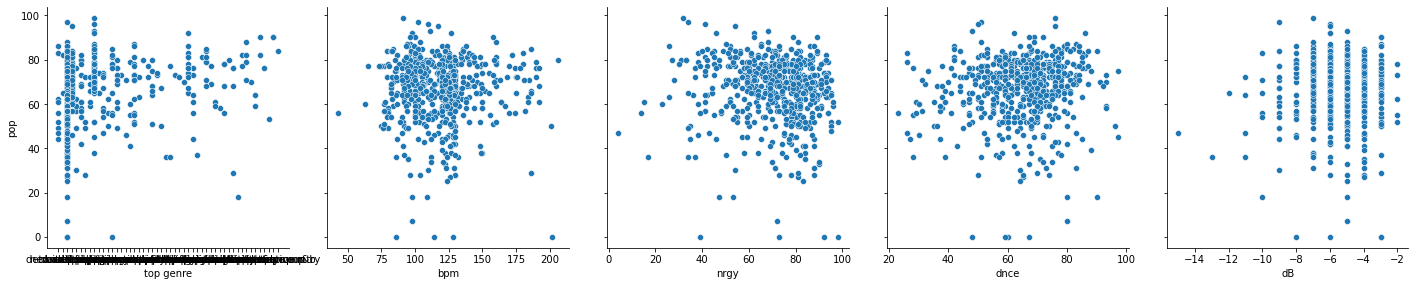

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(spotify_df, x_vars=['top genre', 'bpm', 'nrgy', 'dnce', 'dB'],
            y_vars='pop', height=4, aspect=1, kind='scatter')
plt.show()

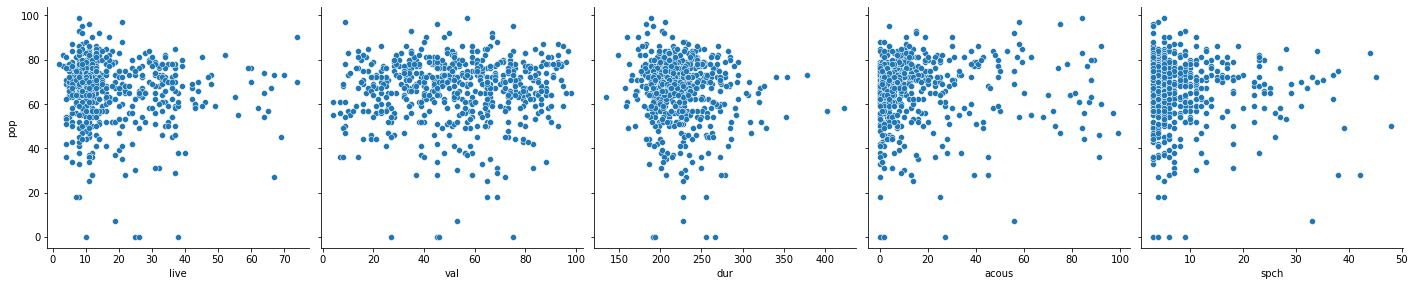

In [3]:
sns.pairplot(spotify_df, x_vars=['live', 'val', 'dur', 'acous', 'spch'],
            y_vars='pop', height=4, aspect=1, kind='scatter')
plt.show()

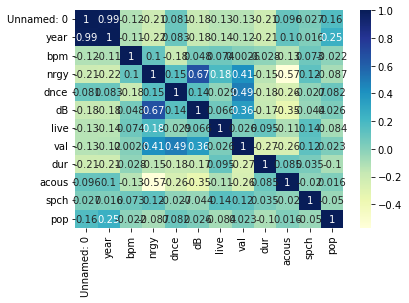

In [4]:
sns.heatmap(spotify_df.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [5]:
X = spotify_df['nrgy']
y = spotify_df['pop']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [7]:
X_train

189    78
398    83
240    71
524    63
23     83
       ..
578    82
53     76
350    56
79     89
520    71
Name: nrgy, Length: 410, dtype: int64

In [8]:
y_train

189    52
398    65
240    62
524    74
23     65
       ..
578    78
53     76
350    84
79     63
520    75
Name: pop, Length: 410, dtype: int64

In [9]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [10]:
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const    73.380278
nrgy     -0.087046
dtype: float64

In [11]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.749
Date:                Wed, 01 Mar 2023   Prob (F-statistic):             0.0535
Time:                        21:06:58   Log-Likelihood:                -1673.3
No. Observations:                 410   AIC:                             3351.
Df Residuals:                     408   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.3803      3.239     22.656      0.000      67.013      79.747
nrgy          -0.0870      0.045     -1.936      0.054      -0.175       0.001
==============================================================================
Omnibus:                      132.949   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.814
Skew:                          -1.501   Prob(JB):                     1.02e-89
Kurtosis:                       6.870   Cond. No.                         329.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

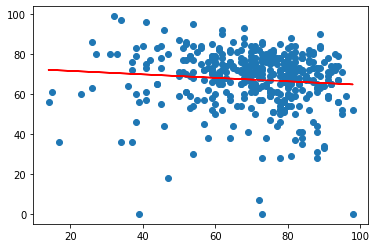

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 73.3803 + -0.0870*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [17]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\dance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


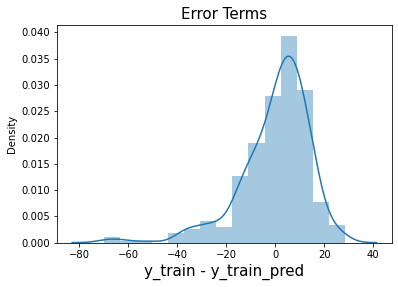

In [18]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

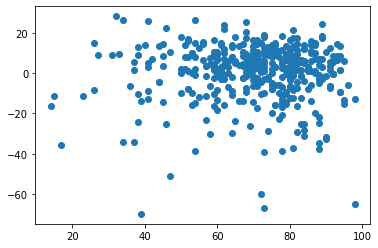

In [19]:
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.009
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It seems fairly predictive, but I think there could be a better option.
3. Was your plot of the error terms a bell curve? A little off-centered, but yes.